## Task1

We have elected to adapt the numerical specifications outlined in the project description due to our utilization of the free version of AnyLogic, limiting our simulation duration to 60 minutes instead of the stipulated 120 minutes. Furthermore, it is noteworthy that the Vienna University of Technology does not provide licenses for the full version of AnyLogic. Consequently, we have modified the specifications as follows:

| Original Specification | Modified Specification |
| --- | --- |
| An estimated 6000 fans are expected               | An estimated 3000 fans are expected |
| First fans arrive 2h before kickoff               | First fans arrive 1h before kickoff | 
| Standard visitor takes 6 ± 3 seconds               | Standard visitor takes 3 ± 1.5 seconds |
| Season ticket holders take 3 ± 1 seconds           | Season ticket holders take 1.5 ± 0.5 seconds |
| 500 Sturm-Liouville Graz Ultras arrive all at once | 250 Sturm-Liouville Graz Ultras arrive all at once |

For task 1, we have a total of 3000 – 250 (ultras) = 2750 expected fans, whom we simulate rushing to the stadium. Among them, 40% are season holders (1100) and 60% are standard visitors (1650). To define the relevant parameters for the number of gates in Task 1, we intend to employ the Monte Carlo method, conducting a substantial number of samples and recording the results. Ideally, an experiment type Monte Carlo is available in the AnyLogic Pro version, as described here: https://anylogic.help/anylogic/experiments/monte-carlo-experiment.html. This functionality is not accessible in the free version. Therefore, for Task 1, we have generated a run CSV file in which we perform a total of 10 simulations for each number of gates. We record and evaluate the absolute arrival rate for supporters after 60 minutes, both in absolute terms and as a percentage. This approach aims to determine the optimal number of gates for the simulation.

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

In [31]:
# Read the CSV file into a DataFrame
df = pd.read_csv('task1.csv', sep=';')

# Display the first few rows using head()
# Convert 'percentage of fans in the stadium' to numeric
df['percentage of fans in the stadium'] = pd.to_numeric(df['percentage of fans in the stadium'].str.replace(',', '.'), errors='coerce')
# Round the 'percentage of fans in the stadium' column to two decimal places
df['percentage of fans in the stadium'] = df['percentage of fans in the stadium'].round(2)
# Round the 'percentage of fans in the stadium' column to two decimal places
df['percentage of fans in the stadium'] = df['percentage of fans in the stadium'].round(2)
df.head()

,employed Gates,Number of simulationruns,percentage of fans in the stadium,number of fans in the stadium
0,1,1,24.51,674
1,1,2,24.58,676
2,1,3,24.69,679
3,1,4,24.58,676
4,1,5,24.04,661


We can see in the task1.csv has the following attributes


The formula for the percentage of fans in the stadium is represented as:


$\frac{numberoffansinthestadium * 100}{2750}$


## Summary Table for Mean Number of Fans and Mean Percentage of Fans per Employed Gates:

In [32]:
# Grouping by 'employed Gates' and calculating the mean
summary_table = df.groupby('employed Gates').agg({
    'number of fans in the stadium': 'mean',
    'percentage of fans in the stadium': 'mean'
}).reset_index()

# Renaming columns for clarity
summary_table.columns = ['Employed Gates', 'Mean Number of Fans', 'Mean Percentage of Fans']

# Displaying the summary table
print(summary_table)


   Employed Gates  Mean Number of Fans  Mean Percentage of Fans
0               1                673.7                   24.498
1               2               1379.9                   50.178
2               3               2114.7                   76.898
3               4               2666.5                   96.961
4               5               2737.7                   99.551


## Histogram Plot for Mean 'Percentage of Fans in the Stadium' per Employed Gates

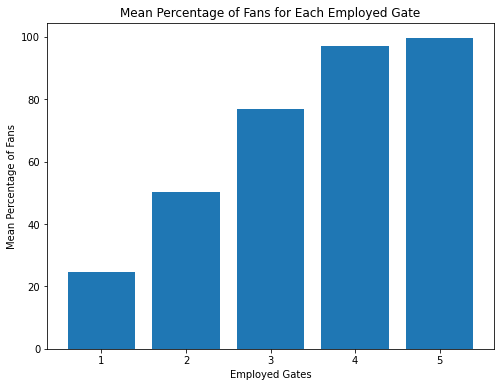

In [33]:
# Plotting the histogram for mean percentage of fans for each employed gate
plt.figure(figsize=(8, 6))
plt.bar(summary_table['Employed Gates'], summary_table['Mean Percentage of Fans'])
plt.xlabel('Employed Gates')
plt.ylabel('Mean Percentage of Fans')
plt.title('Mean Percentage of Fans for Each Employed Gate')
plt.show()

After conducting an extensive Monte Carlo simulation using the run CSV file, we have determined that employing 5 gates provides an optimal configuration for ensuring a smooth and efficient entry of fans to the stadium. As a result, for the other subsequent tasks, we will maintain this number of gates to uphold the simulation parameters and align with the insights derived from the Monte Carlo experiment.